In [4]:
from IPython.display import Image

# 1部 予測の評価

## 1.1 予測の活用と予測の評価
予測を使うことのメリットが、そのコストに見合うかどうかを検討することは重要だよね。

▼ 言葉の定義
- カテゴリー予測
  - 「今日の天気は雨だろう」「今月は好況だろう」
  - 予測の結果がカテゴリカルに語られる予測
- 数量予測
  - 「今日の気温は20度になるだろう」「今月は商品が4000個売れるだろう」
  - 予測結果が定量的に語られる予測
  

## 1.2 的中率の問題点

▼ 的中率とは  
「予測=実測値」となった回数 ÷ 予測した回数

- 予測を評価する時に「的中率」だけで評価すると、間違った評価をすることになるケースもあるよ
  - 砂漠の天気予測をする時は、常に「明日は晴れる」といっておけば的中率はすごい高い。しかし、その予測にお金を払う意味はあるか？ ないよね
  - 「明日の天気は、雨が降るか、降らないかのどちらかです」という予測に価値がある？ 的中率は100％だけど、その予測に意味はないよね。

## 1.3 予測の評価の3つの観点

- 一貫性:consistency
- 品質：quality
- 価値：value

## 1.4 予測の一貫性 : consistency

▼ 一貫性基準とは
- 予測を出す際に用いられた様々な知識と、実際の予測結果との間の一貫性が、ある基準に達しているかどうか？でその予測を評価する
  - 「高気圧が来る→晴れ」という知識があり、実際高気圧が来てるのに、予測結果として(なんか気が向かないから)「雨」を出すということは、一貫性を欠いている、ということになるらしい

詳しくは第5部で。

## 1.5 予測の品質 : quality

▼ 「品質」とは  
- 予測の品質は、それに対応する観測値との__関連性__から判断される
  - __尺度指向アプローチ : Measure-Oriented (MO)__
    - 「的中率」などの尺度を使って予測の品質を評価するアプローチ
    - 予測と実測値のうち、少数の側面しか評価できない
  - __分布指向アプローチ : Distribution-Oriented (DO)__
    - 予測値と実測値の同時分布を使って予測の品質を評価するアプローチ
    - より包括的な評価ができる

以降では、「分布指向アプローチ(DO)」を使って話を勧めていく

## 1.7 予測の分割表

### 1.7.1 カテゴリー予測の評価
2カテゴリー予測の場合、以下のような同時分布(__分割表__)を得る事になる。

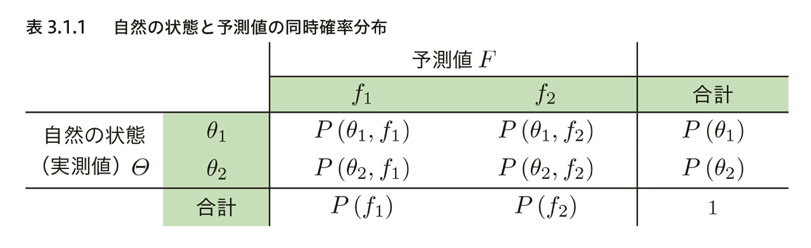

In [8]:
Image('imgs/table_3_1_1.png')

最初からこんな同時確率分布が得られたら、的中率含めたいろんな評価指標が得られるけど、世の中そんなに甘くない。  
いきなり確率分布では得られないので、実測値の度数をもとにして、この表を作り、予測の評価に使う。

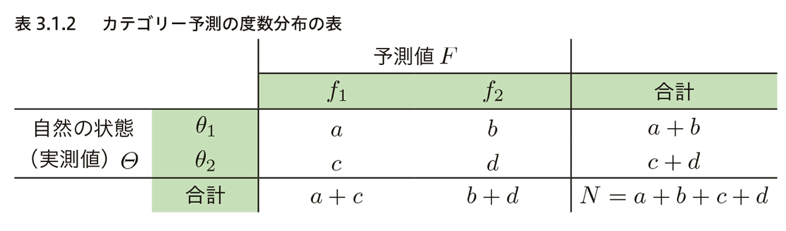

In [9]:
Image('imgs/table_3_1_2.png')

- N ： 総予測回数
- 各度数をNで割った相対度数を使う
  - 同時確率分布の推定値として、相対度数を使う的な
  - $P(\theta_1, f_1) \simeq \frac{a}{N}$ みたいな
- この分割表、すんごい大事らしい
  - 以降で色々と評価指標の定義を学ぶが、__この表のある一面を見ているに過ぎない。__
  - つまり、予測を総合的に評価するには、__この分割表の形式で予測結果が得られている事が必要__
  - この分割表は、__過去の予測結果の評価をしている__ という事も重要
    - 予測が検証された時と、実際の運用される時の品質は、同じ状況を再現はできないので変わってくる(当然よね)
    - なので、評価時の品質と、運用時の品質のズレを少なくするために、分割表を得る際には何らかの工夫をする必要がある
      - ex: 訓練データとテストデータを分けるのも、その工夫の一つ
- この分割表を得るために使ったサンプルには、__バイアスが入っていない事が重要__

### 1.7.2 数量予測の評価
上述のカテゴリカルな予測ではなく、数量予測の場合でも同じように分割表で評価できないか検討したほうがよい。  

- データをいくつかの階級にわけて(bin作って)分割表にするとか
  - 階級の分け方で結果が変わるので要注意だけど
- 分割表が作れない時でも、最低限 __散布図__ は書いたほうがよい
  - 横軸：予測値
  - 縦軸：実測値
  - 視覚的には分割表と同じようなノリで使えるよね
  
★ とにかく、RMSE などの単一指標だけで予測の品質評価をするのは危険ですよ、と

## 1.8 分割表から計算できる指標
尺度指向アプローチで、分割表から出せる指標を色々紹介していく。

用意する分割表は、よりイメージしやすくするために以下のものを想定。

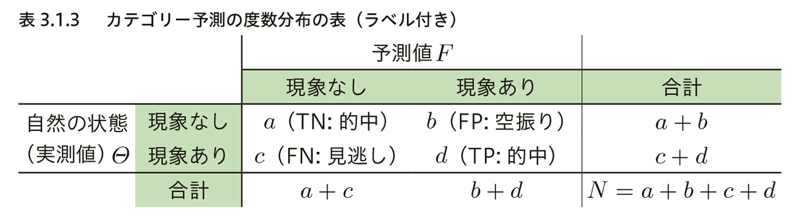

In [10]:
Image('imgs/table_3_1_3.png')

- TN : True Negative
  - 的中
- FN : False Negative
  - 偽陰性
  - 見逃し
- FP : False Positive
  - 偽陽性
  - 空振り
- TP : True Positive
  - 的中

空振りとか、余計わかりにくい気がするんだけどね。

- 偽陽性率(空振り率)
  - $ b/N $。本書ではこっち
  - $ b/(b+d) $ で出すケースもあるらしい
    - 予測として「陽性」判断をしたケースのうち、実際は陰性だった割合
- 偽陰性率(見逃し率)
  - $ c/N $。本書ではこっち
  - $ c/(c+d) $ で出すケースもあるらしい
    - __実測値__の「現象あり」の総数を分母にしてる。
    - ようは、実際は陽性なのに、それを陰性と判断する割合、って感じかな
    

### 1.8.1 的中率 : 正解率
$ Accuracy = \frac{a+d}{N} = P(\theta_1, f_1) + P(\theta_2, f_2)$

- $\theta_1$ だと予測して実際に $\theta_1$ だった時の確率と、$\theta_2$ だと予測して実際に $\theta_2$ だった時の確率の合計
- 1から、見逃し率と 空振り率を引いたもの、とも言える

### 1.8.2 適合率：精度
$ Precision = \frac{d}{b+d} = P(\theta_2|f_2) $

- 陽性だと予測して、実際に陽性だった割合

### 1.8.3 再現率
$ Recall = \frac{d}{c+d} = P(f_2|\theta_2) $

- 実測値が陽性だった場合に、予測も陽性だった割合
- 分割表の行の方で見てる感じ

### 1.8.4 F値
$ F値 = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} $

- 適合率と再現率の調和平均
- 再現率と適合率の関係性
  - 再現率(Recall)：上げたいのであれば、常に陽性と予測していれば1になる
  - 適合率(Prescision)：Recall最大化のために「常に陽性」予測だと、FP(空振り)も増えるので、適合率は下がる
- 上記の関係性から、「当てずっぽうの陽性予測とはなっていない」事を1指標で判断できるよう、調和平均を取った、的な。
  - Recall の改良版…？

### 1.8.5 バイアススコア
実際に陽性になった回数に対して、陽性予測した回数の比率。

$ BI = \frac{b+d}{c+d} $

- 0以上の値を取る
- 1の場合：実際陽性になった確率と、陽性と予測した確率が同じ → 予測に偏りなし
- 1以上：実測と比べて、予測が陽性側に偏ってる
- 1以下：実測と比べて、予測が陰性側に偏ってる

### 1.8.6 出現率
$ 出現率 = P(\theta_2) = \frac{c+d}{N} $

- 実測値における陽性の割合
  - 興味のある現象(陽性)が、実際どれくらいの割合でおこることなのか？を表す指標
  - 予測とは関係ない指標だけど、意外と大事
- 出現率 0.5 の現象を予測しているのか、出現率0.999 の予測をしてるのか、の明示は、色々と誤解を避けられそうよね

▼ ここまでの指標についてのTips
- 適合率、再現率、F値
  - 出現率の影響をある程度緩和できる事がある
- 的中率
  - 出現率の影響をもろに受ける

★ とはいえ、やっぱ__分割表は必ずチェックしようね__。見過ごしとかあるから。


## 1.9 数量予測を評価する指標
数量予測でも分割表使うほうがいいんだけど、分割表使わんくても計算できる指標が提案されてるんで、それをいくつか紹介するね
  

### 1.9.1 平均誤差：Mean Error
$ ME = \frac{1}{N} \sum_{i=1}^{N}( y^{(i)} - \hat{y}^{(i)} )$

- あまり使われないけど、他の指標の意味を理解する上では役に立つ
- $y^{(i)}$ : 実測値
- $ \hat{y}^{(i)} $ : 予測値
- $ y^{(i)} - \hat{y}^{(i)} $ は、つまりは__予測誤差(予測残差)__ よね
- 予測誤差の平均が、平均誤差

評価指標の意義を体感するために、具体例で使ってみるよ。

- 予測A：予測誤差が、+1、-1 となる予測 → ME = 0
- 予測B：予測誤差が、+1000、-1000 となる予測 → ME = 0

どっちも ME=0 で、予測品質的には同じくらいという判断になるけど、Aのほうが優秀っぽくない？  
こういう事があるから、あまり使えないよね、と。

### 1.9.2 MAE : Mean Absolute Error

$ MAE = \frac{1}{N} \sum_{i=1}^{N} | y^{(i)} - \hat{y}^{(i)} | $

- 予測A：予測誤差が、+1、-1 となる予測 → MAE = 1
- 予測B：予測誤差が、+1000、-1000 となる予測 → MAE = 1000

### 1.9.3 MSE : Mean Squared Error

$ MSE = \frac{1}{N} \sum_{i=1}^{N} ( y^{(i)} - \hat{y}^{(i)} )^2 $

### 1.9.4 RMSE : Root Mean Squared Error

$ RMSE = \sqrt{MSE} = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} ( y^{(i)} - \hat{y}^{(i)} )^2 } $

- MAE と RMSE は似たような使われ方をするらしい
- ただし、RMSEはMAEと比べると、平均誤差が1以下ならより小さく、1以上ならより大きく出てくる(2乗してるからね)
  - 予測値でたまたま1つだけ大きくハズレる予測が出た場合、RSME は MAE より大きくなりやすい
- 例
  - 予測A：予測誤差が、+50、-50 となる予測 → MAE = 50, RMSE = 50
  - 予測B：予測誤差が、+1、+100 となる予測 → MAE $\approx 51, RMSE \approx 71$ 

### 1.9.5 MAPE : Mean Absolute Percentage Error

$ MAPE = \frac{1}{N} \sum_{i=1}^{N} | 100 \times \frac{ y^{(i)} - \hat{y}^{(i)} }{ y^{(i)} } | $

- 実測値に占める誤差の比率(の平均)
- 単位をなくせるのが大きな利点
  - 複数の予測品質を比較する際に、この単位をなくした指標が使われる
- 残念なところ
  - 分母(実測値)が0に近い値のとき、誤差が小さくてもMAPEが大きくなってしまう
  - 実測値が0近辺の値を取らないかどうか？の確認が必要

### 1.9.6 MASE : Mean Absolute Scaled Error

- 時系列予測の評価に用いられる。けどそれ以外でもこの指標のアイディア自体は参考になるよ
- 「単純な予測ロジックを使って予測した時のMAE」を使って、評価したい予測手法の誤差をスケーリングさせる手法
  - 時系列において「単純な予測ロジック」としてよく使われるのは、「1時点前の値を予測値として使う」
- データを訓練データとテストデータにわけて算出

まずは、スケーリングに使う「単純な予測ロジックを使って予測した時のMAE」の定義式  
(単純なロジックとして、1時点前の値を予測値として使う場合)

$ MAE_{naive} = \frac{1}{T-1} \sum_{t=2}^{T} | y^{(t)} - y^{(t-1)} | $

テストデータにおける予測誤差 $ e^{(i)} $ を $ MAE_{naive} $ でスケーリングした値を定義

$ q^{(i)} = \frac{e^{(i)}}{ MAE_{naive} } $

スケーリングされた予測誤差に対して、MAE的な計算をしたものが、MASE。

$ MASE = \frac{1}{N} \sum_{i=1}^{N} |q^{(i)}|$

- MAEはスケーリングされているので単位がない
- 分母が特定の1つのデータではないので、たまたま分母が0につかくなって、誤差が極端に大きくなる問題もない

★ ここで筆者はなんども言うが、MASEが優秀な指標だとしても、分割表/散布図は描け、といっている。


## 1.10 予測の価値

基本的には、6章でみた「情報の価値」の事(。。。であってる？)

- 情報の価値 = 予測の情報に価値があるのかどうか？を考えていたので、イコール予測の価値ですよね。
- 情報の価値とは、予測と実測の同時分布と、利得行列で算出ができる
  - その点では、__「予測の品質」では「利得行列」は一切使ってない__ので、そこが大きく異るポイント
    - 予測を使うユーザーにとって価値があるのかどうか？を語るのが「予測の価値」
    - 「予測の品質」は、単純にその予測の品質。予測を使うユーザーに価値をもたらすのかどうか？は考えてない
- 必要なもの
  - 予測値と実測値の分割表を同時分布の形で
  - 利得行列
  

★ 予測の価値を評価する際、予測を使う人(=意思決定者)の利得行列を得るのが難しい事が多い
→ 次の章で、利得行列に「コスト/ロス比のシチュエーション」を仮定して、簡便に予測の価値を評価する方法を解説

